This notebook is the tester for developing a system for recording models in a simplistic method

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import skew


import logging
log = logging.getLogger(__name__)

logging.basicConfig(filename='{}.log'.format('test'), level=logging.DEBUG)
log.info('Initiated Logging')



In [2]:
from lifecycle import database
from lifecycle import models


%load_ext autoreload
%autoreload 2

log.info('creating model lifecycle class')
my_life = models.lifecycle()
mydb = database.lifecycle_db (
    username = 'projectUser',password = 'DCUpassword',
    user='brendan.bonner2@mail.dcu.ie', organisation='Dublin City University',
    lifecycle=my_life)
mydb.init_model_db()


In [3]:
model_vgg16 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

model_vgg16_imagenet = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)


model_vgg16_test = model_vgg16_imagenet

model_resnet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=500
)


model_resnet50_imagenet = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None
)

In [4]:

vgg_signature1 = mydb.push_model(model_vgg16)
print(vgg_signature1)
vgg_signature2 = mydb.push_model(model_vgg16_test)
print(vgg_signature2)



d3736a95cbc627a29203563dbf00a643ec1dffd4bd3a5af2c8b5dd33d11917f0
ede69fca86a03c780a98dcec6fc1cfe406a3448dcba95663baa18bf853bc2f0f


In [5]:
# get a signature and write it to the model

local = True

parent = mydb.push_model(model_resnet50,local=local)
last = mydb.push_model(model_resnet50_imagenet,parent=parent,local=local)
print(parent, last)
parent = mydb.push_model(model_vgg16_imagenet,local=local)
last = mydb.push_model(model_vgg16_test, parent=parent,local=local)
print(parent, last)


6908bf510614228f4b57f2428cea4a87a16f7d2bf3880a43cc98edc40d98ce1f 11038ddd9667dc41fdda32191266367a344ac28c0dde3bb3f5a86d8c7b67f0b0
ede69fca86a03c780a98dcec6fc1cfe406a3448dcba95663baa18bf853bc2f0f ede69fca86a03c780a98dcec6fc1cfe406a3448dcba95663baa18bf853bc2f0f


In [6]:
# Push all default models from Keras
keras_model_list = {
    'VGG16': tf.keras.applications.VGG16,
    'DenseNet121': tf.keras.applications.DenseNet121,
    'Xception': tf.keras.applications.Xception,
    'ResNet50': tf.keras.applications.ResNet50,
    'ResNet50V2': tf.keras.applications.ResNet50V2,
    'MobileNet': tf.keras.applications.MobileNet,
    'MobileNetV2': tf.keras.applications.MobileNetV2
}

local=False

for name, model_type in enumerate(keras_model_list):
    print(model_type)
    model = keras_model_list[model_type]()
    print(mydb.push_model(model,model_source = model_type, organisation='Keras',local=local))



VGG16
ede69fca86a03c780a98dcec6fc1cfe406a3448dcba95663baa18bf853bc2f0f
DenseNet121
42f9a65180edde3acf9eb4a0ff56659d79e2f7093e62d5a2de315555307b5e96
Xception
bbd930cc56dfa39dc55e1318d9b5da2571d9eff0eeb96de7648faacb69c253cd
ResNet50
11038ddd9667dc41fdda32191266367a344ac28c0dde3bb3f5a86d8c7b67f0b0
ResNet50V2
10bf6fbdb86fca9e3e1bce872218c43a7017d4b13b397dfa1ab756eca3dc7d0b
MobileNet
39b71fdd645325e8eef30d20de0eae89016a1433fad4ce4e72bba89d42194c8e
MobileNetV2
67e68324dfc941f6318304b99e0afddd8d50fd1636204701949fa2777428f308


In [56]:
xception1 = mydb.get_model_data(signature='11038ddd9667dc41fdda32191266367a344ac28c0dde3bb3f5a86d8c7b67f0b0')
xception2 = mydb.get_model_data(signature='10bf6fbdb86fca9e3e1bce872218c43a7017d4b13b397dfa1ab756eca3dc7d0b')

x = xception1['structure']
y = xception2['structure']

shared_items = {k: x[k] for k in x if k in y and x[k] == y[k]}
print (len(shared_items))
unshared_items = {k: x[k] for k in x if k in y and x[k] != y[k]}
print (len(unshared_items))


24
153


In [61]:
# Push the default vgg if not already pushed
last = mydb.push_model(model_vgg16_imagenet, parent=vgg_signature2, user='brendanboner@gmail.com', local=True)

In [60]:
model_vgg16_test = model_vgg16_imagenet

In [62]:
# Test capacity to differentiate small changes

import random

layer_ref = random.randint(0,10)

for x in range(10):
    weights = model_vgg16_test.layers[1].get_weights()
    # weights[0][0][0][0][layer_ref] = weights[0][0][0][0][layer_ref] * 1.001
    weights[0][0][0] = weights[0][0][0] * 0.25

    model_vgg16_test.layers[1].set_weights(weights)
    last = mydb.push_model(model_vgg16_test, parent=last)
    print(last)


91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08
91c9120842bd9efcfb26bd6bae1eb55cf6347702f371bfbdc1ea835f9ecb5d08


In [63]:
# Compare Updated Model
model_trail = mydb.get_history(last)
for x in model_trail:
    print_struct = False
    if x['structure']:
        if x['structure'] > 0: s = True

    if x['data']:
        print_val = (1 - x['data']) * 100
    else:
        print_val = 0

    print('{} {}, Structure Change: {}, Value Change {:.4f}%'. format(
        x['timestamp'],
        x['username'],
        print_struct,
        print_val))


2021-08-05 00:50:27+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change 0.0000%
2021-08-05 00:50:24+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change 0.0000%
2021-08-05 00:50:21+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change 0.0000%
2021-08-05 00:50:18+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change 0.0000%
2021-08-05 00:50:15+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change 0.0000%
2021-08-05 00:50:12+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change 0.0000%
2021-08-05 00:50:09+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change -0.0000%
2021-08-05 00:50:06+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change -0.0006%
2021-08-05 00:50:03+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Change -0.0100%
2021-08-05 00:50:00+00:00 brendan.bonner2@mail.dcu.ie, Structure Change: False, Value Ch

In [30]:

ancestor = mydb.get_ancestor(last)

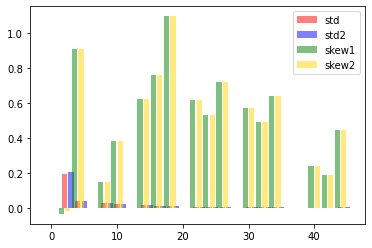

In [64]:
#Display a comparison of multiple layers

def hist_weights(sig1, sig2):

    hist_std1 = []
    hist_std2 = []
    hist_skew1 = []
    hist_skew2 = []

    hist_1 = mydb.get_model_data(signature=sig1)
    hist_2 = mydb.get_model_data(signature=sig2)

    for key, value in hist_1['data'].items():
        hist_std1.append(value['weight_std'])
        hist_skew1.append(value['skew'])

    for key, value in hist_2['data'].items():
        hist_std2.append(value['weight_std'])
        hist_skew2.append(value['skew'])

    layers = len(hist_1['data'])
    plt.bar( np.arange(layers) * 2, hist_std1, color = 'red' , alpha=0.5, label='std')
    plt.bar( np.arange(layers)* 2 + 1, hist_std2, color = 'blue', alpha=0.5, label='std2' )
    plt.legend(loc='upper right')
    plt.show

    plt.bar( np.arange(layers) * 2 -0.5, hist_skew1, color = 'green' , alpha=0.5, label='skew1')
    plt.bar( np.arange(layers)* 2 + 0.5, hist_skew2, color = 'gold', alpha=0.5, label='skew2' )
    plt.legend(loc='upper right')
    plt.show


#hist_weights(sig1, sig2)
hist_weights(last, ancestor)


std diff : -126595.3922 %
skw diff : 100.0000 %


<function matplotlib.pyplot.show(close=None, block=None)>

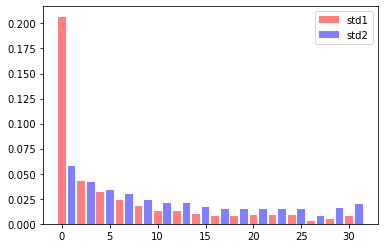

In [ ]:
hist_std = 1
hist_skew = 1
for i,v in enumerate(hist_std1):
    if (v != 0):
        hist_std = (hist_std2[i] / v) * hist_std
    if (hist_skew1[i] != 0):
        hist_skew = (hist_skew2[i] / hist_skew1[i]) * hist_skew

print ('std diff : {:.4f} %'.format((1-hist_std) * 100))
print ('skw diff : {:.4f} %'.format((1-hist_skew) * 100))

layers = len(hist_std1)


plt.bar( np.arange(layers) * 2, hist_std1, color = 'red' , alpha=0.5, label='std1')
plt.bar( np.arange(layers)* 2 + 1, hist_std2, color = 'blue', alpha=0.5, label='std2' )
plt.legend(loc='upper right')

plt.show



16


<function matplotlib.pyplot.show(close=None, block=None)>

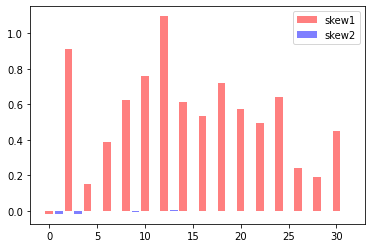

In [ ]:
layers = len(hist_skew1)
print(layers)
plt.bar( np.arange(layers) * 2, hist_skew1, color = 'red' , alpha=0.5, label='skew1')
plt.bar( np.arange(layers)* 2 + 1, hist_skew2, color = 'blue', alpha=0.5, label='skew2' )
plt.legend(loc='upper right')
plt.show

In [45]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model

model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model2 = Sequential()
model2.add(Dense(12, input_dim=8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model1.summary(), model2.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
____________________________________

In [48]:

sig1 = mydb.push_model(model1)
sig2 = mydb.push_model(model2)

print(mydb.get_signature(sig1))
mydb.compare_models(sig1,sig2)

{'_id': ObjectId('610b31e1a985835c60aec9ab'), 'signature': 'ad0d96dbe354e2c07000ed44e7613fbd15acffda58a0e1ec350cf8a6dbd5bee3', 'parent': None, 'username': 'brendan.bonner2@mail.dcu.ie', 'organisation': 'Dublin City University', 'model_source': '', 'model_data': ObjectId('610b31e1a985835c60aec9aa')}


{'structure': {'dictionary_item_added': 1},
 'data': [0.9886274302058712, 1.1771883825934093, 1.5374055067233445]}